In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [13]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cmocean import cm

import glob

# set up figure params
sns.set(style='ticks', context='paper', palette='colorblind')
mpl.rc('figure', dpi=100, figsize=[7, 3])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

In [10]:
def alphabet_label(fig):
    ''' Give each subplot a alphabetic label at top left corner'''
    for i,ax in enumerate( fig.get_axes() ):
        ax.annotate(chr(i+65),(0,1.02),xycoords='axes fraction',weight='bold')

In [11]:
data_path = '../../data/drifters/'
figure_path = '../../figures/'
nfiles = glob.glob(data_path+'deformation_n_6_T_90d_split_*')

NameError: name 'df' is not defined

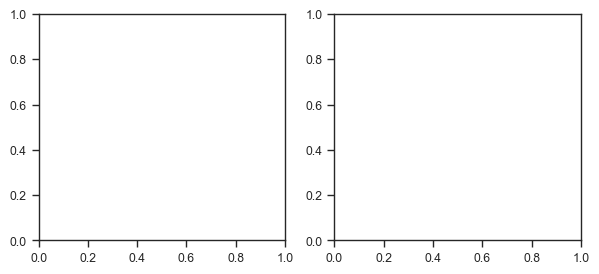

In [7]:
f,(ax1,ax2) = plt.subplots(1,2)

df.plot(x='dtime',y=['mean_length','median_length'],ax=ax1,label=['Mean','Median'], legend=False)
ax1.fill_between(x='dtime', y1=df.lo_length, y2=df.hi_length,
                 alpha=0.6, edgecolor=None, facecolor='gainsboro',linewidth=1, data=df)
ax1.set_xlabel(r'Time $t-t_0$ [d]')
ax1.set_ylabel('Length scale L [km]')
#ax1.set_title('length scale L')
# ax1.legend(loc=2,frameon=False)


xtest = np.linspace(0,20,100)
ax1.plot(xtest,40*np.exp( 0.2*xtest),'k' ,lw=1)
ax1.annotate(r'$e^{0.2t}$',(7,40*np.exp( 0.2*6)), color='k')
xtest = np.linspace(15,40,100)
ax1.plot(xtest, xtest**1.6-80 ,'k',lw=1)
ax1.annotate(r'$t^{1.6}$',(22,20**1.6-80), color='k')
xtest = np.linspace(0,40,100)
ax1.plot(xtest, xtest**1+100 ,'k',lw=1)
ax1.annotate(r'$t^{1}$',(1,1**1+103), color='k')
ax1.set_xlim(0,30)
ax1.set_ylim(0,250)
ax1.legend(loc=3,frameon=False)

df.plot(x='dtime',y=['mean_aspect','median_aspect'],ax=ax2,label=['Mean','Median'],legend=False)
ax2.fill_between(x='dtime', y1=df.lo_aspect, y2=df.hi_aspect,
                 alpha=0.6, edgecolor=None, facecolor='gainsboro',linewidth=1, data=df)
ax2.set_ylabel(r'Aspect ratio $\alpha$')
ax2.set_xlabel(r'Time $t-t_0$ [d]')
#ax2.set_title(r'aspect ratio $\alpha$')
ax2.set_xlim(0,30)
ax2.set_ylim(0,0.4)
xtest = np.linspace(0,10,100)
ax2.plot(xtest,0.4*np.exp( -0.6*xtest) ,'k',lw=1)
ax2.annotate(r'$e^{-0.6t}$',(2,0.4*np.exp( -0.6*1)), color='k')
ax2.set_yticks(np.arange(0,0.41,0.1))

alphabet_label(f)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig(figure_path+'deformations_n6.pdf')
plt.show()